
## How to Use the Notebooks

To run these notebooks, follow these steps:


### 1. Install **`gdal`** Package
Installing `gdal` via `pip` may fail. Therefore, we recommend using conda to install it:
```bash
conda install gdal -c conda-forge
```

### 2. Install **`polsartools`** Package

Before running the notebooks, you'll need to install the core **`polsartools`** package. 

**Option A:** Install from PyPI `pip` (stable release)

```bash
pip install polsartools
```

**Option B:** Install from conda (stable release)

```bash
conda install polsartools -c bnarayanarao
```


**Option C:**  Install the latest version from GitHub (if you need recent updates or fixes)

```bash
pip install git+https://github.com/Narayana-Rao/polsartools.git#egg=polsartools
```
> **Note:** If you encounter a `"module not found"` error or require newer features, prefer the **Option C**.

### 3. Verify the Installation

After successfully installing `polsartools`, you can verify it by importing the package:

```bash
import polsartools as pst
```

If this runs without errors, you're ready to explore and run the notebooks.




In [ ]:
""" import required packages"""

import polsartools as pst
import os
import matplotlib.pyplot as plt
import numpy as np
from osgeo import gdal
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=UserWarning, module='pyproj')


#### 1. Extract multilooked C2 matrix from NISAR GSLC data
##### using **`polsartools.nisar_gslc`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/sensors/nisar.html#gslc-nisar-gslc) or run `print(polsartools.nisar_gslc.__.doc__)`


In [ ]:

inFile =r"GSLC_DP.h5"

# The following function extracts a multilooked C2 matrix from NISAR dual-polarimetric GSLC data. 
# Provide path to the NISAR RSLC .h5 file.

pst.nisar_gslc(inFile,azlks=2,rglks=2) 

Detected L-band ['HH' 'HV'] 
Extracting C2 matrix elements...
Saved file .\GSLC_DP\C2/C11.bin
Saved file .\GSLC_DP\C2/C22.bin
Saved file .\GSLC_DP\C2/C12_real.bin
Saved file .\GSLC_DP\C2/C12_imag.bin
Execution time for nisar_gslc: 2.00 seconds


#### 2. Speckle filtering using polarimetric refined-Lee filter (optional)

In [3]:
c2Folder = os.path.join(inFile.split('.h5')[0],'C2')
window_size = 3
pst.rlee(c2Folder,window_size=window_size)

Progress : 100%|███████████████████████████████████████████████████████████████████| 12/12 [00:03<00:00,  3.17 block/s]


Saved file GSLC_DP_rlee_3x3\C2\C11.bin
Saved file GSLC_DP_rlee_3x3\C2\C12_real.bin
Saved file GSLC_DP_rlee_3x3\C2\C12_imag.bin
Saved file GSLC_DP_rlee_3x3\C2\C22.bin
Execution time for rlee: 5.00 seconds


#### 3. Generate a quick look RGB from C2 matrix (optional)

GSLC_DP\C2
RGB image saved as GSLC_DP_rlee_3x3\C2\RGB4.png
Execution time for dxpRGB: 1.00 seconds


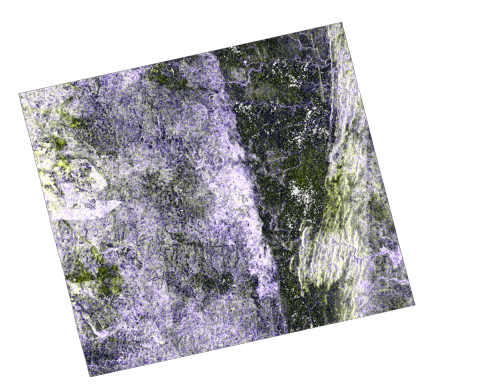

In [4]:
print(c2Folder)
c2Folder = os.path.join(inFile.split('.h5')[0]+f'_rlee_{window_size}x{window_size}','C2')
# pst.utils.dxpRGB(c2Folder,type=1)
# pst.utils.dxpRGB(c2Folder,type=2)
# pst.utils.dxpRGB(c2Folder,type=3)
pst.utils.dxpRGB(c2Folder,type=4)

#### 4. Generating some polarimetric parameters from C2 matrix

##### 4.1 Barakat Degree of polarization 
##### using `polsartools.dopdp` function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/DOP_dp.html) or run `print(polsartools.dopdp.__.doc__)`


In [5]:

pst.dopdp(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.22 block/s]


Saved file GSLC_DP_rlee_3x3\C2\dopdp.tif
Execution time for dopdp: 3.00 seconds


##### Preview the output

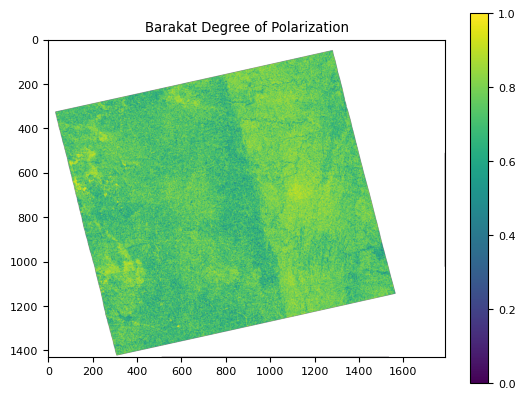

In [ ]:


data = pst.utils.read_bin(c2Folder+'/dopdp.tif')
fig,ax = plt.subplots()
plt.imshow(data,vmin=0,vmax=1)
ax.set_title('Barakat Degree of Polarization')
plt.colorbar()



##### 4.2. Entropy-Alpha (H/α) parameters 
##### using **`polsartools.halphadp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/halphadxp.html) or run `print(polsartools.halphadp.__.doc__)`


In [7]:
pst.halphadp(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.76 block/s]


Saved file GSLC_DP_rlee_3x3\C2\Hdp.tif
Saved file GSLC_DP_rlee_3x3\C2\alphadp.tif
Execution time for halphadp: 5.00 seconds


##### Preview the output

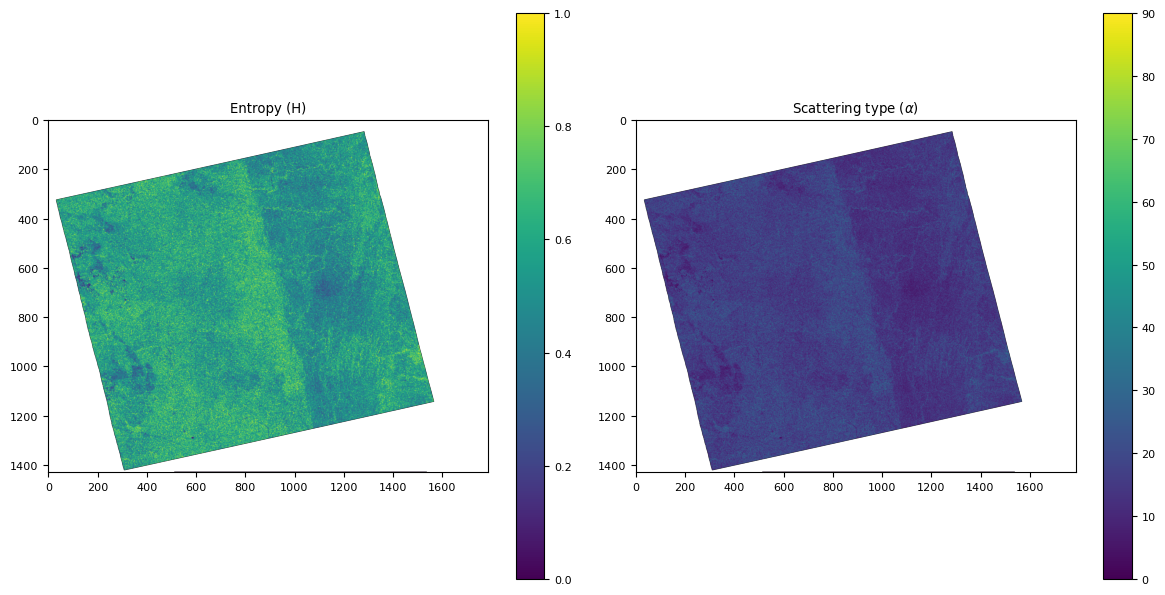

In [8]:

data1 = pst.utils.read_bin(c2Folder + '/Hdp.tif')
data2 = pst.utils.read_bin(c2Folder + '/alphadp.tif')
# fig, ax = plt.subplots(ncols=2)
fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

ax[0].imshow(data1, vmin=0, vmax=1)
ax[0].set_title("Entropy (H)")
fig.colorbar(ax[0].imshow(data1, vmin=0, vmax=1), ax=ax[0])

ax[1].imshow(data2, vmin=0, vmax=90)
ax[1].set_title(r"Scattering type ($\alpha$)")
fig.colorbar(ax[1].imshow(data2, vmin=0, vmax=90), ax=ax[1])

plt.tight_layout()

##### Plot Entropy-Alpha plot for dual-pol
##### using **`polsartools.halpha_plot_dp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/halpha_plot_dp.html) or run `print(polsartools.halpha_plot_dp.__.doc__)`

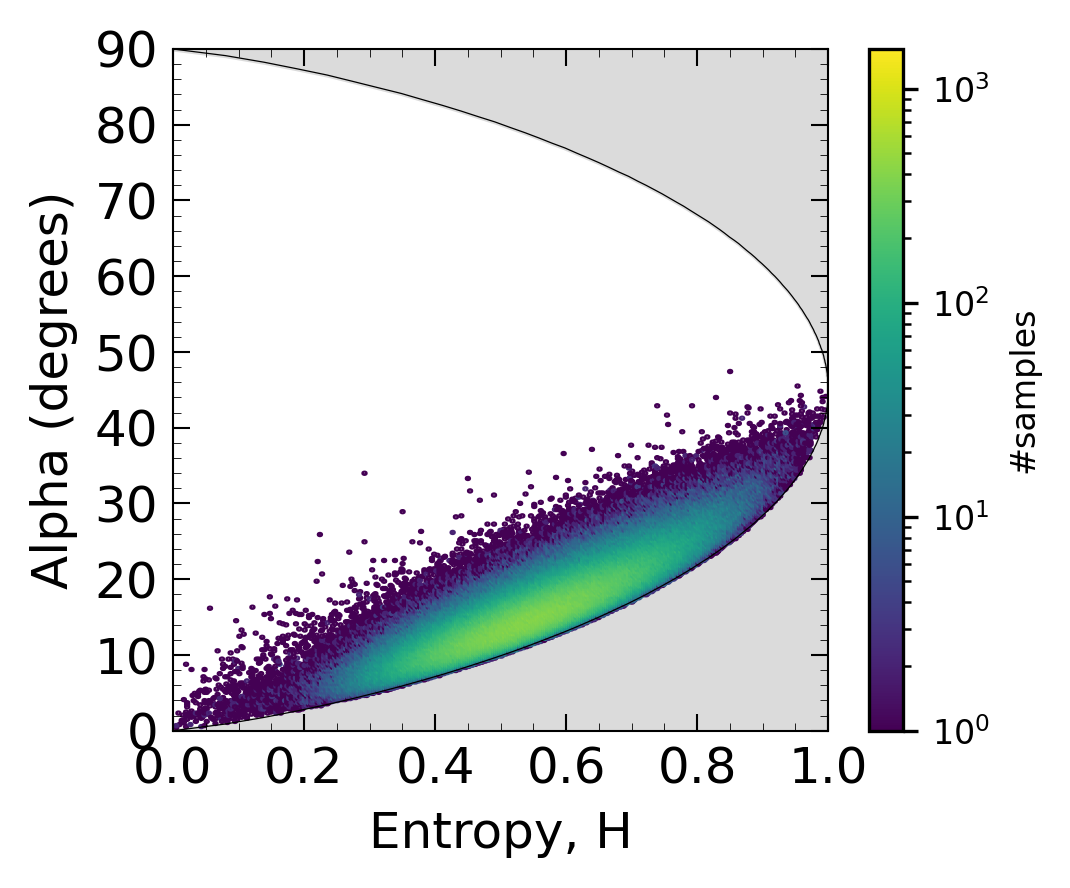

In [9]:
h = pst.utils.read_bin(c2Folder + '/Hdp.tif')
alpha = pst.utils.read_bin(c2Folder + '/alphadp.tif')

pst.halpha_plot_dp(h,alpha,norm='log')

##### 4.3. Shannon Entropy parameters (SE is the sum of contributions from intensity (SEI) and polarimetry (SEP))
##### using **`polsartools.shannon_h_dp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/shannon_h_dp.html) or run `print(polsartools.shannon_h_dp.__.doc__)`

In [10]:
pst.shannon_h_dp(c2Folder,window_size = 3)

Progress : 100%|███████████████████████████████████████████████████████████████████| 12/12 [00:04<00:00,  2.57 block/s]


Saved file GSLC_DP_rlee_3x3\C2\H_Shannon.tif
Saved file GSLC_DP_rlee_3x3\C2\HI_Shannon.tif
Saved file GSLC_DP_rlee_3x3\C2\HP_Shannon.tif
Execution time for shannon_h_dp: 5.00 seconds


##### Preview the output

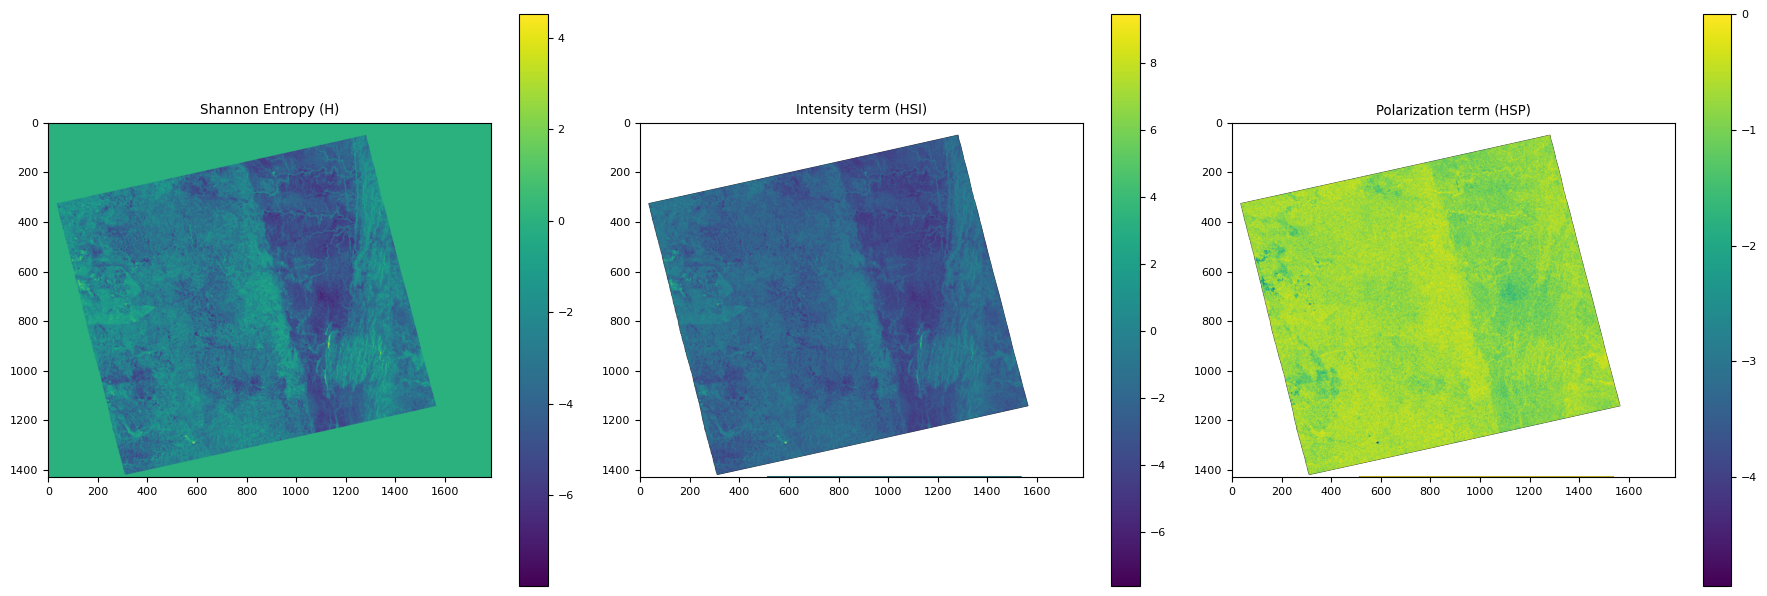

In [11]:
data1 = pst.utils.read_bin(c2Folder + '/H_Shannon.tif')
data2 = pst.utils.read_bin(c2Folder + '/HI_Shannon.tif')
data3 = pst.utils.read_bin(c2Folder + '/HP_Shannon.tif')

fig, ax = plt.subplots(ncols=3, figsize=(18, 6))

ax[0].imshow(data1)
ax[0].set_title("Shannon Entropy (H)")
fig.colorbar(ax[0].imshow(data1), ax=ax[0])

ax[1].imshow(data2)
ax[1].set_title(r"Intensity term (HSI)")
fig.colorbar(ax[1].imshow(data2), ax=ax[1])

ax[2].imshow(data3)
ax[2].set_title(r"Polarization term (HSP)")
fig.colorbar(ax[2].imshow(data3), ax=ax[2])

plt.tight_layout()

##### 4.4. vegetation indices, Radar vegetation index (RVI), Dual-pol Radar Vegetation Index (DpRVI)

##### using **`polsartools.rvidp`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/RVI_dp.html) or run `print(polsartools.rvidp.__.doc__)`

##### using **`polsartools.dprvi`** function, [click here for documentation](https://polsartools.readthedocs.io/en/latest/files/functions/dual_pol/DpRVI.html) or run `print(polsartools.dprvi.__.doc__)`




In [12]:

pst.rvidp(c2Folder)

pst.dprvi(c2Folder)


Progress : 100%|███████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.24 block/s]


Saved file GSLC_DP_rlee_3x3\C2\rvidp.tif
Execution time for rvidp: 3.00 seconds


Progress : 100%|███████████████████████████████████████████████████████████████████| 12/12 [00:02<00:00,  4.10 block/s]


Saved file GSLC_DP_rlee_3x3\C2\dprvi.tif
Execution time for dprvi: 3.00 seconds


##### Preview the output

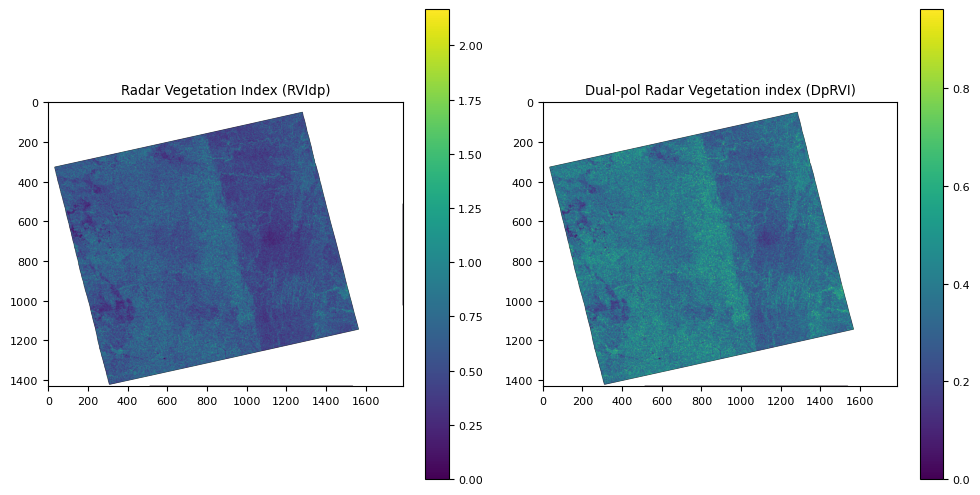

In [13]:

data1 = pst.utils.read_bin(c2Folder + '/rvidp.tif')
data2 = pst.utils.read_bin(c2Folder + '/dprvi.tif')

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

ax[0].imshow(data1, vmin=0, vmax=np.nanmax(data1))
ax[0].set_title("Radar Vegetation Index (RVIdp)")
fig.colorbar(ax[0].imshow(data1, vmin=0, vmax=np.nanmax(data1)), ax=ax[0])

ax[1].imshow(data2, vmin=0, vmax=np.nanmax(data2))
ax[1].set_title(r'Dual-pol Radar Vegetation index (DpRVI)')
fig.colorbar(ax[1].imshow(data2, vmin=0, vmax=np.nanmax(data2)), ax=ax[1])

plt.tight_layout()